# Atividade de Statistical Learning

Este *notebook* é destinado à solução da lista de exercícios sobre Statistical Learning, passada durante as aulas da disciplina e baseada na apresenação sobre o tema, realizada pelo [Leandro Turi](https://github.com/leandrofturi). O objetivo desta atividade é criar um conjunto de dados artificial e realizar algumas regressões lineares. O conteúdo teórico pode ser acessado no repositório do Leandro por meio deste [link](https://github.com/leandrofturi/StatisticalLearning).

# Importações

In [1]:
# ferramentas matemáticas
import numpy as np

# ferramentas gráficas
import matplotlib.pyplot as plt

# ferramentas de aprendizado de máquina
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# utils
from utils import process

# Resolução

Pede-se, primeiramente, para se criar um vetor de entrada contendo 100 observações, geradas por meio de uma distribuição normal N(0,1), supondo que elas pudessem ser oriundas de um sensor qualquer, colhidas a 100 hz durante 1 segundo. Além disso, também foi pedido para se criar um termo estocástico com N(0;0,25).

In [2]:
# criação do vetor x
np.random.seed(42)
x = np.random.normal(0, 1, size=(100,))

# criação do termo estocástico
e = np.random.normal(0,.25, size=(100,))

Após a criação desses dois vetores, pode-se determinar, por meio da equação abaixo, um conjunto de saída que possua uma boa correlação linear com o vetor de entrada. Note que, como $y$ será computado por meio de dois vetores de tamanho 100, esse novo vetor também terá tamanho 100. Ademais, pode-se observar que a relação possui um termo linear ($\beta _0$) igual a 3 e um termo ângular ($\beta _1$) igual a 2. Verifica-se, por meio do *scatter plot* abaixo, que as variáveis criadas artificialmente apresentam a correlação linear esperada.

> $y = 3 + 2x + \epsilon$

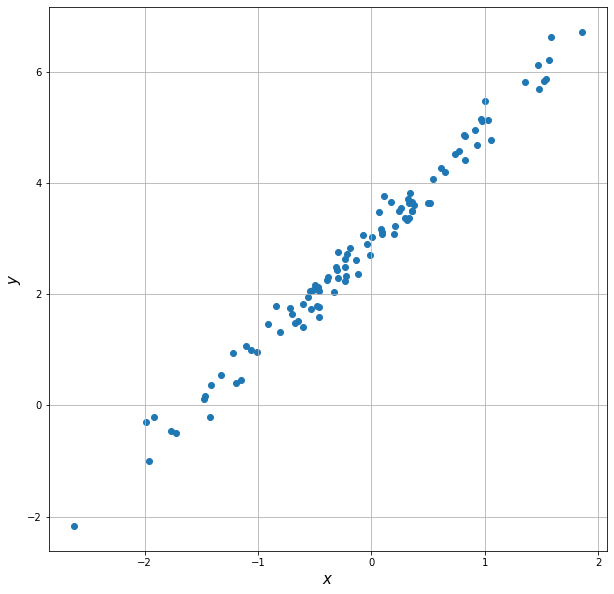

In [3]:
# criação do vetor y
y = 3 + 2*x + e

# gráfico de disperção x-y
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)
ax.set_xlabel(f'$x$', size=15)
ax.set_ylabel(f'$y$', size=15)
ax.grid()

Criados os conjuntos de entrada e saída, pode-se realizar uma regressão linear por mínimos quadrados para o ajuste de $x$ em $y$. Observa-se que a curva ajustada apresenta erros absoulutos entre os $\beta _0$ de 0,002 e entre os $\beta _1$ de 0,046, garantindo assim uma boa representação, com um $R^2$ de 0,9997.

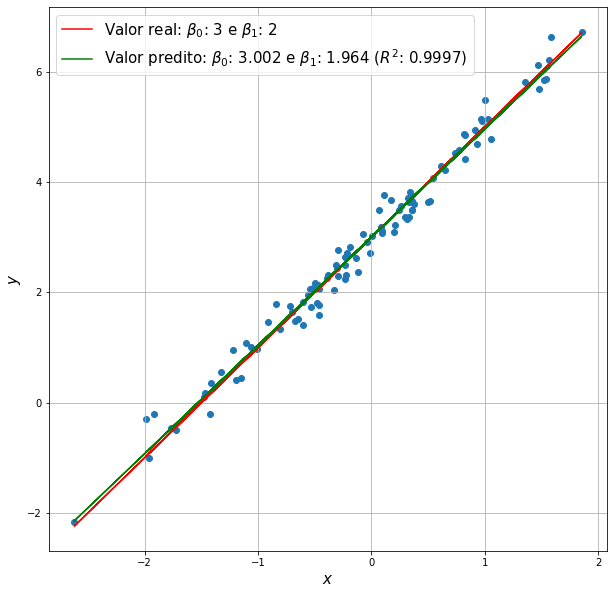

In [4]:
# reta real, sem ruído
yt = 3 + 2*x

# criação e treinamento do regressor
lreg = LinearRegression()
lreg.fit(x.reshape(-1,1), y)

# predição de x
y_ = lreg.predict(x.reshape(-1,1))
rsquared = np.round(r2_score(yt, y_), decimals=4)

# coeficientes da reta
w = np.round(lreg.coef_[0], decimals=3)
b = np.round(lreg.intercept_, decimals=3)

# plotagem
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, yt, 'r', label=r'Valor real: $ \beta _0$: 3 e $\beta _1$: 2')
ax.plot(x, y_, 'g', label=r'Valor predito: $ \beta _0$: {} e $\beta _1$: {} ($R^2$: {})'.format(b, w, rsquared))
ax.scatter(x, y)
ax.set_xlabel(f'$x$', size=15)
ax.set_ylabel(f'$y$', size=15)
ax.grid()
ax.legend(prop={'size': 15})

Uma boa forma de verificar a performance de um problema de regressão se da por meio da avaliação do resíduo do modelo. Observa-se nenhuma relação entre as predições e os resíduos, apresentados no gráfico abaixo, tão pouco a presença de padrões. Dessa forma, pode-se concluir que o modelo de regressão foi bem ajustado.

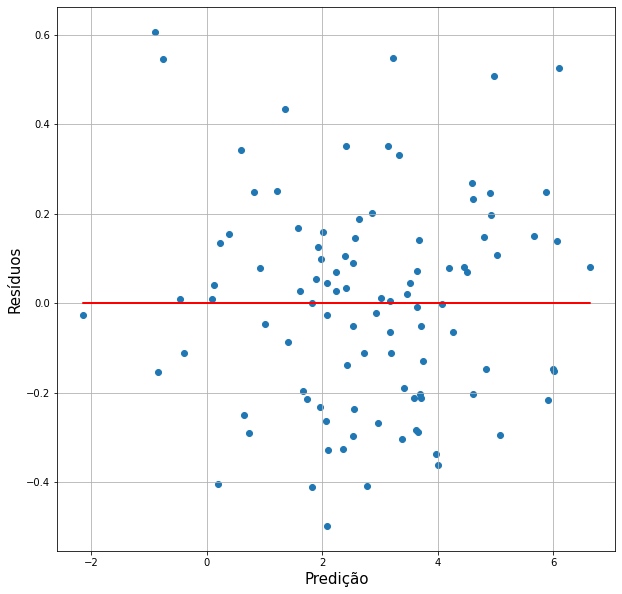

In [5]:
# avaliação dos resíduos
res = y - y_

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_, res)
ax.plot(y_, np.zeros_like(res), 'r')
ax.set_xlabel(f'Predição', size=15)
ax.set_ylabel(f'Resíduos', size=15)
ax.grid()

Como forma de experimentação, pode-se realizar uma regressão quadrática por mínimos quadrados como forma de verificação se o conjunto de dados trabalhado se adequa melhor a uma curva de grau 2. Para tanto, basta criar um vetor $x^2$ e alimentar o modelo de regressão linear com os vetores $x$ e $x^2$. Observe que, mesmo que os coeficientes de determinação tenham dado muito parecidos, o suposto polinômio de segundo grau possui um coeficiente $\beta_2$ praticamente nulo, fazendo com que a curva se assemelhe, em muito, com uma reta.

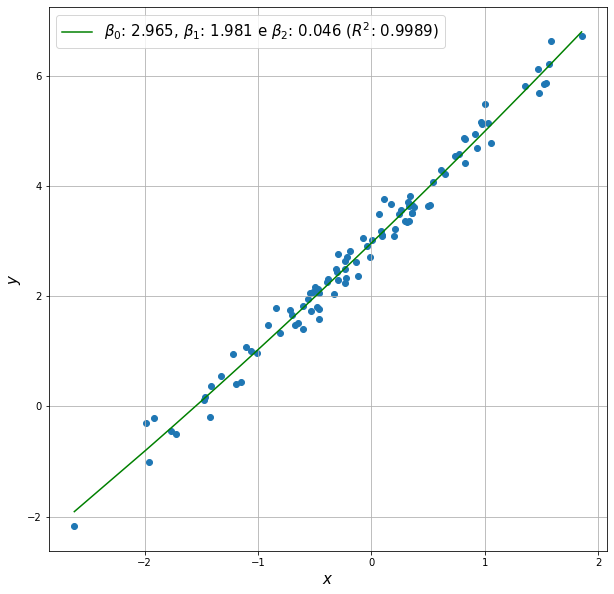

In [6]:
# criação do vetor de segunda ordem e adequação do conjunto de entrada
x_squared = x**2
xtrain = np.c_[x, x_squared]

# criação e treinamento do regressor
lreg = LinearRegression()
lreg.fit(xtrain, y)

# predição de x
y_ = lreg.predict(xtrain)
rsquared = np.round(r2_score(yt, y_), decimals=4)

# coeficientes da curva
w = np.round(lreg.coef_, decimals=3)
b = np.round(lreg.intercept_, decimals=3)

# plotagem
x_sorted = x.copy()
x_sorted.sort()
y_sorted = y_.copy()
y_sorted.sort()

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_sorted, y_sorted, 'g', label=r'$ \beta _0$: {}, $\beta _1$: {} e $\beta_2$: {} ($R^2$: {})'.format(b, w[0], w[1], rsquared))
ax.scatter(x, y)
ax.set_xlabel(f'$x$', size=15)
ax.set_ylabel(f'$y$', size=15)
ax.grid()
ax.legend(prop={'size': 15})

Por último, ainda em caráter experimental, pode-se verificar como se comportaria a regressão caso o termo estocástico possuísse uma distribuição com menor ou maior variabilidade. Nos gráficos abaixo, observa-se regressões com geração de ruído para desvios padrão 5 vezes menor e 5 vezes maior, respectivamente, do que o que foi apresentado acima. Note como o termo de erro impacta diretamente na dispersão dos pontos em relação à reta verdadeira ($y = 3 + 2x$) e na performance da regressão linear. Pode-se ver, também, que embora os gráficos de resíduos não mostrem tendência ou padrão, as amplitudes dos erros absolutos apresentam valores maiores com o aumento da dispersão do termo estocástico.

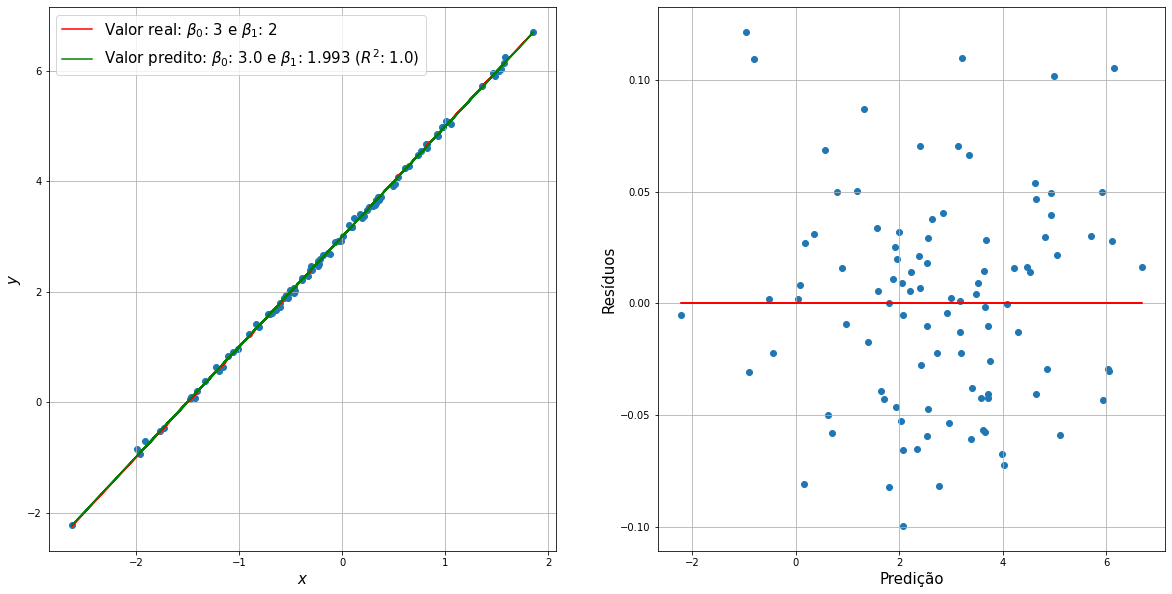

In [7]:
# criação de um conjunto com menos ruído
np.random.seed(42)
x_less = np.random.normal(0, 1, size=(100,))
e_less = np.random.normal(0,.05, size=(100,))
y_less = 3 + 2*x + e_less

# pipeline de regressão
lreg = process.SL_pipeline().fit(x_less.reshape(-1,1), y_less)
lreg.results(x_less.reshape(-1,1), y_less)

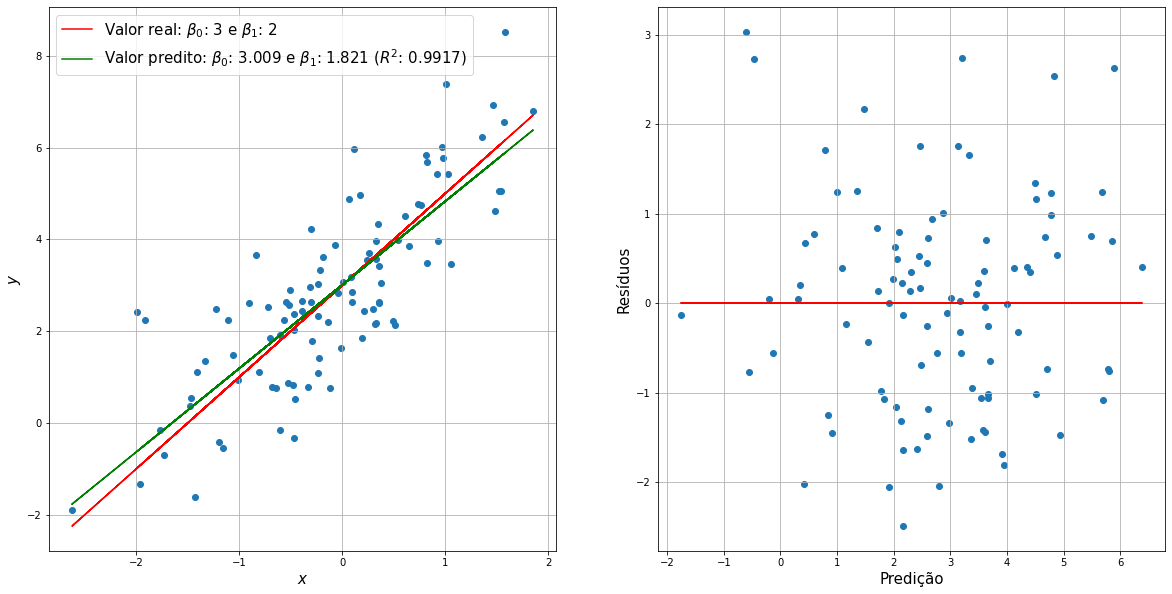

In [8]:
# criação de um conjunto com mais ruído
np.random.seed(42)
x_greater = np.random.normal(0, 1, size=(100,))
e_greater = np.random.normal(0, 1.25, size=(100,))
y_greater = 3 + 2*x_greater + e_greater

# pipeline de regressão
lreg = process.SL_pipeline().fit(x_greater.reshape(-1,1), y_greater)
lreg.results(x_greater.reshape(-1,1), y_greater)